# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [27]:
!pip install matplotlib
#gráficos

!pip install seaborn   
#gráficos

!pip install scikit-learn 
#inteligência artificial
#sklearn

In [28]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [29]:
import seaborn as sns 
"""o seaborn é mais simples que o matplotlib. 
Ele foi criado usando o matplotlib, então sempre importe o matplotlib junto.""" 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

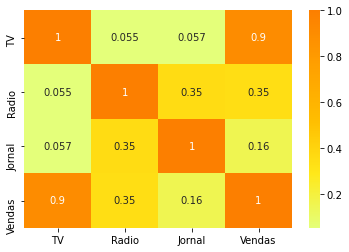

In [30]:
#cria o gráfico
sns.heatmap(tabela.corr(), cmap = 'Wistia', annot= True)
#mapa de calor da correlação
#cmap - Escala de cor
#annot -  números dentro do gráfico



#exibe o gráfico
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [31]:
y = tabela["Vendas"]
x = tabela[['TV', 'Radio', 'Jornal']]

In [32]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [34]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics
print(metrics.r2_score(y_teste,previsao_regressaolinear))
print(metrics.r2_score(y_teste,previsao_arvoredecisao))

0.9071151423684273
0.9652471845177535


#### Visualização Gráfica das Previsões

<function matplotlib.pyplot.show(*args, **kw)>

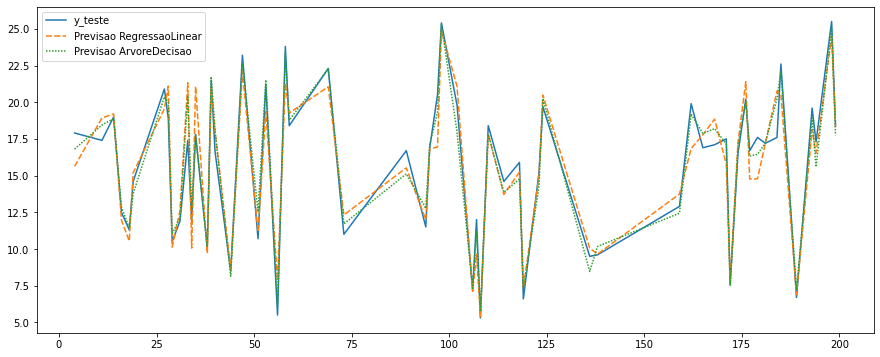

In [35]:
#O modelo de árvore de decisão é o melhor modelo.

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"]=y_teste
tabela_auxiliar["Previsao RegressaoLinear"]= previsao_regressaolinear
tabela_auxiliar['Previsao ArvoreDecisao'] = previsao_arvoredecisao


#criando gráfico
plt.figure(figsize=(15,6))
sns.lineplot(data = tabela_auxiliar)
plt.show

#### Como fazer uma nova previsão?

In [36]:
#importar nova base de dados

nova_tabela= pd.read_csv('novos.csv')
display(nova_tabela)

previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.507  8.52  19.74 ]
